## Hi all, This is Amirtha Ganesh R

so we are going to build a classification model which is going to tell us whether a given msg is spam or ham 

In [2]:
import pandas as pd

In [3]:

df = pd.read_csv(r'E:\Machine learning project\Spam_ham\SMSSpamCollection.csv', sep='\t',header=None, names = ['label','text'], encoding="latin-1")
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## data preprocessing 

In [4]:
# dropping the duplicates
df.drop_duplicates(inplace= True)

In [5]:
# encoding ham/spam
df['label'] = df['label'].map({'ham':0,'spam':1})

In [6]:
df

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ã¼ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [7]:
# checking wether the data is balanced or not 

df['label'].value_counts()  # the dataset is unbalanced!! Still we are not doing anything 

label
0    4516
1     653
Name: count, dtype: int64

In [8]:
# cleaning the text columns 
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    
    return ' '.join(tokens)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
df['text'] = df['text'].apply(clean_text)

In [10]:
# TF-IDF Vectorization

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['text'])


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# X = vectorized features (TF-IDF or CountVectorizer)
# y = labels (0 = ham, 1 = spam)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# Naive Bayes
# -----------------------------
print("\n🔹 Naive Bayes Results")
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

# -----------------------------
# Logistic Regression (normal)
# -----------------------------
print("\n🔹 Logistic Regression (Normal)")
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# -----------------------------
# Logistic Regression (Balanced)
# -----------------------------
print("\n🔹 Logistic Regression (Class Balanced)")
lr_balanced = LogisticRegression(max_iter=1000, class_weight="balanced")
lr_balanced.fit(X_train, y_train)
y_pred_lr_bal = lr_balanced.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_lr_bal))
print(confusion_matrix(y_test, y_pred_lr_bal))
print(classification_report(y_test, y_pred_lr_bal))

# -----------------------------
# Random Forest (optional, handles imbalance decently)
# -----------------------------
print("\n🔹 Random Forest (Class Balanced)")
rf = RandomForestClassifier(class_weight="balanced", n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))



🔹 Naive Bayes Results
Accuracy: 0.9709864603481625
[[903   0]
 [ 30 101]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       903
           1       1.00      0.77      0.87       131

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034


🔹 Logistic Regression (Normal)
Accuracy: 0.9477756286266924
[[900   3]
 [ 51  80]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       903
           1       0.96      0.61      0.75       131

    accuracy                           0.95      1034
   macro avg       0.96      0.80      0.86      1034
weighted avg       0.95      0.95      0.94      1034


🔹 Logistic Regression (Class Balanced)
Accuracy: 0.9700193423597679
[[887  16]
 [ 15 116]]
              precision    recall  f1-score   support

           0       0.98      0.98      0


🔹 Model Comparison:

                 Accuracy  Precision    Recall  F1-Score
Naive Bayes      0.970986   1.000000  0.770992  0.870690
LogReg           0.947776   0.963855  0.610687  0.747664
LogReg Balanced  0.970019   0.878788  0.885496  0.882129
Random Forest    0.974855   0.990654  0.809160  0.890756


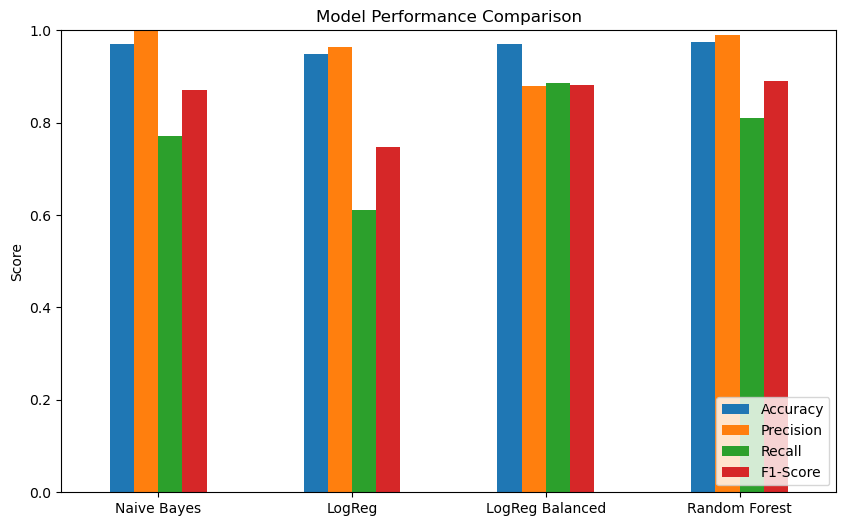

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary to store results
results = {}

# Helper function
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    }

# Evaluate all models
evaluate_model("Naive Bayes", nb, X_test, y_test)
evaluate_model("LogReg", lr, X_test, y_test)
evaluate_model("LogReg Balanced", lr_balanced, X_test, y_test)
evaluate_model("Random Forest", rf, X_test, y_test)

# Convert to DataFrame
df_results = pd.DataFrame(results).T
print("\n🔹 Model Comparison:\n")
print(df_results)

# Bar plot for visualization
df_results.plot(kind="bar", figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0,1)
plt.legend(loc="lower right")
plt.show()
